In [16]:
## Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import transforms
import pandas as pd
import seaborn as sns
#from matplotlib.ticker import FixedLocator, FixedFormatter

from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine import *
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line
from plotnine import ggplot  # https://plotnine.readthedocs.io/en/stable/
import pandas as pd
import plotnine
%matplotlib inline

from pandas import DataFrame
from matplotlib import gridspec

from  mizani import formatters # for better axis labelling

import matplotlib.ticker as ticker

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
BLUE5, BLUE6 = '#92CDDD', '#2E869D'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1, ORANGE2, ORANGE3 = '#F79747', '#FAC090', '#F36721'

In [70]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

#### Get data frames

In [4]:
df = pd.read_csv ( "Data/FIG0226-27.csv")
# Get rid of the trailing null row

# Clean up Revenue which has form $10,000  (needs to be 10000)
df.Revenue  = df.Revenue.astype ( 'string' )
df['Revenue'] = df['Revenue'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(int)

# Concatenate cols
df['year_qrt'] = df['Year'].astype('string') + '-' + df['Quarter'].astype ('string')

df

,Year,Quarter,Revenue,Size of Salesforce,year_qrt
0,2013,Q1,563000,82,2013-Q1
1,2013,Q2,498000,91,2013-Q2
2,2013,Q3,682000,105,2013-Q3
3,2013,Q4,875000,112,2013-Q4
4,2014,Q1,634000,111,2014-Q1
5,2014,Q2,618000,109,2014-Q2
6,2014,Q3,813000,110,2014-Q3
7,2014,Q4,956000,110,2014-Q4


In [8]:
def SWD_style ():

    # Basic information from the 
    
    font = "Arial"
    #t=theme_minimal(base_size = 10, base_family = font ) 

    t2 = theme(
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),

      axis_line = element_line(size = .2, color = GRAY9),
      axis_text = element_text(color = GRAY3, size = 12),

      #axis.ticks.x = element_line(size = 0.5, color = GRAY9),
      #axis.ticks.y = element_line(size = 0.5, color = GRAY9),
        
      axis_title = element_text(color = GRAY3),

      #axis_title_y = element_text(hjust = 1, margin = margin(0, 6, 0, 15, "pt")),
      #axis_title_x = element_text(hjust = 0, margin = margin(6, 0, 15, 0, "pt")),
      #plot_subtitle = element_text(color = GRAY4, size= 8),

      plot_title = element_text(color = GRAY4, size= 12 ),
        
      # I don't think this line is implemented in plotnine
      #plot_title_position = "plot", # This aligns the plot title to the very left edge
        
      #plot_caption = element_text(hjust = 0, color = GRAY6),
      #plot_caption_position = "plot",

      #plot_margin = margin(.5,.5,.5,.5,"cm"),
      #plot_margin = (0.4 ),  
        
      strip_text = element_text(color = GRAY7)
      , panel_background = element_blank()
      ,axis_ticks = element_blank()
        
    ) 
    
    return t2 

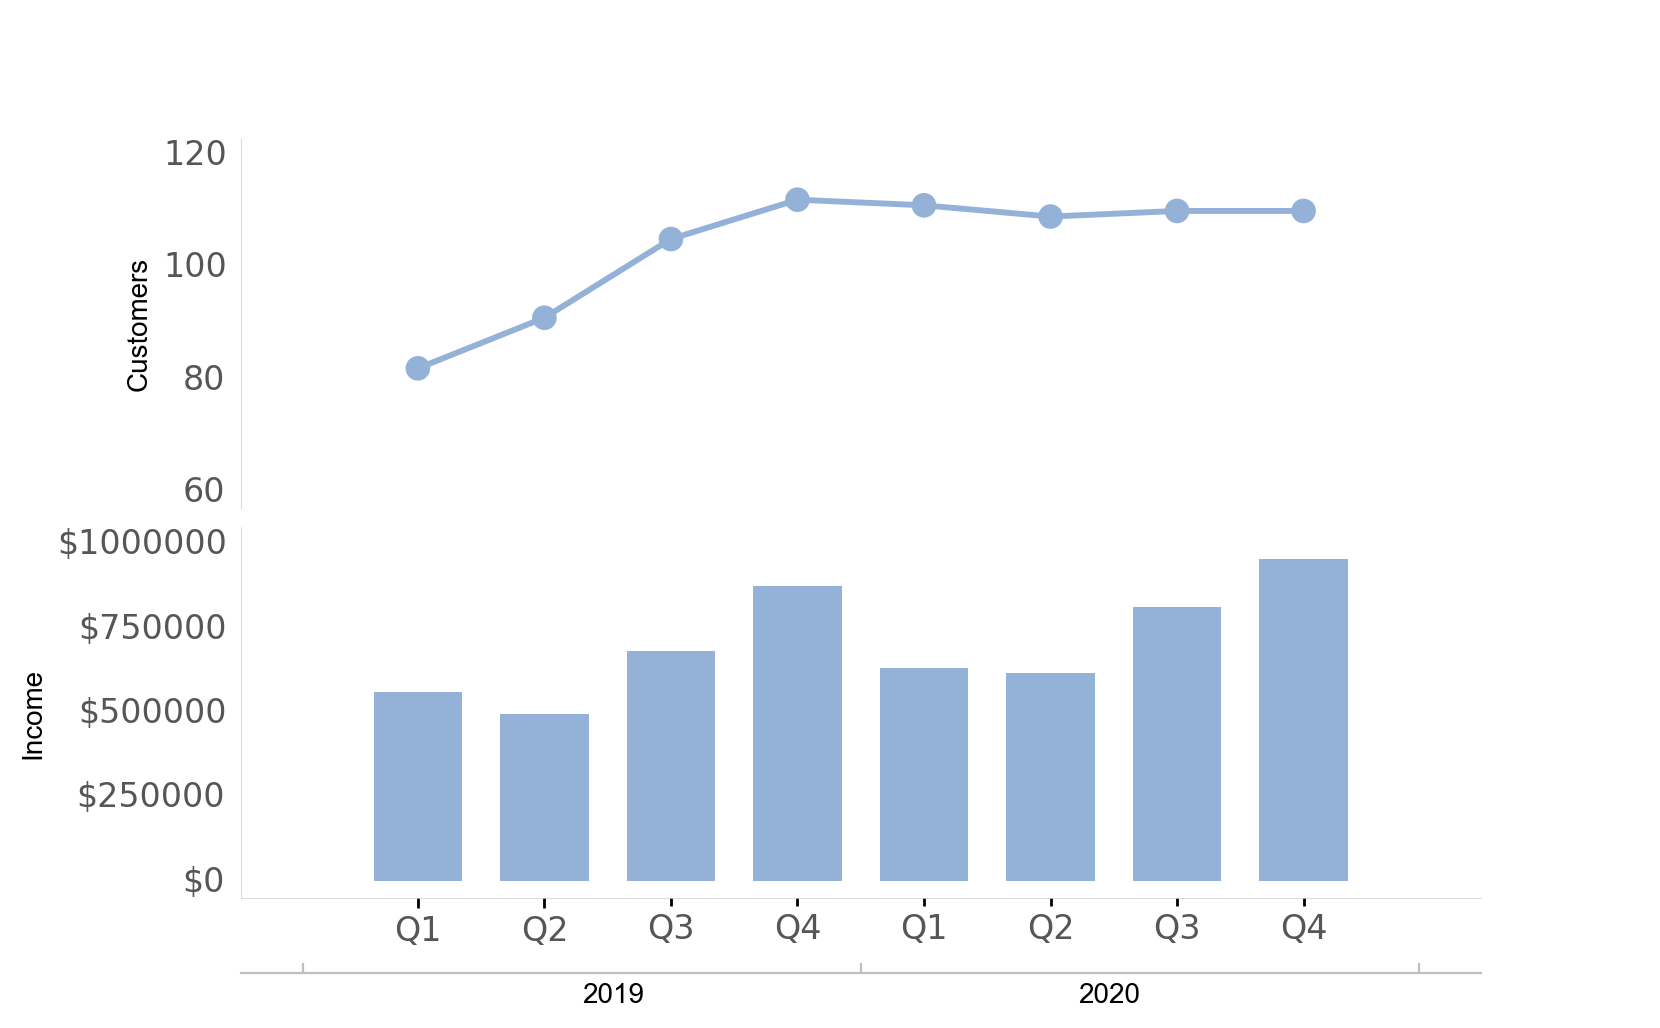

In [139]:

theme_pt1 = theme (
          axis_title_x  = element_blank(),
          axis_text_x  = element_blank(),
          axis_line_x  = element_blank(),
          # this line below will not work.
          #axis_title_y  = element_blank()
 
#       #coord_capped_cart(left = "both") +
    
          # I think this is  is inherited from fig and makes the left margin 20% in each case.
          #subplots_adjust={'left': 0.7}
    
)

p1 = (
  ggplot(  df, aes(x = "year_qrt", y = "Size of Salesforce", group = 1)  )  +\
       geom_point(color = BLUE3, size = 4)     +\
       geom_line (color = BLUE3, size = 1.2)   +\
       scale_y_continuous(limits = [60, 120]) +\
       scale_x_discrete (labels = df.Quarter ,  expand = [0.2,0]) +\
       SWD_style() + theme_pt1 +\
       labs(title = "Alternative 2: pull apart vertically", y = "# of Sales\nEmplyees", ylab='Customers' ) 
)

p2 = (
   ggplot(  df, aes(x = "year_qrt", y = "Revenue", group = 1)  )  +\
       geom_col(fill = BLUE3, width = 0.7)  +\
       scale_x_discrete (labels = df.Quarter ,  expand = [0.2,0]) +\
       SWD_style() +\
       scale_y_continuous(
           labels = formatters.dollar_format(digits=0),
           limits = [0, 1000000] ) +  SWD_style() 
)  

# Empty plotnine figure to place the subplots on. Needs junk data (for backend "copy" reasons).
fig = (ggplot()+geom_blank(data=df) +theme_void()).draw(show=False, return_ggplot=False)  

# Create gridspec for adding subpanels to the blank figure
gs = gridspec.GridSpec(2,1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])

gs.update(wspace=0.5, hspace=0.05) # set the spacing between axes. 

# Add subplots to the figure
_=p1._draw_using_figure(fig, [ax1])
_=p2._draw_using_figure(fig, [ax2] )


fig.dpi = 200
width_in = 8
#plt.subplots_adjust={'left': 0.6}
fig.set_size_inches(width_in , width_in/1.62) 


# Y axis labels.

fig.axes[1].set_ylabel ('Customers')
fig.axes[2].set_ylabel ('Income')

    
#########################################
# Second X-axis
ax22 = ax2.twiny()
#ax2.axis('Off') # don't draw anything.

ax22.spines['top'].set_visible(False)
ax22.spines['right'].set_visible(False)
ax22.spines['left'].set_visible(False)

ax22.spines["bottom"].set_position(("axes", -0.20))
ax22.tick_params('both', length=0, width=0, which='minor')
ax22.tick_params('both', direction='in', which='major')
ax22.xaxis.set_ticks_position("bottom")

# this sets the position of the secondary axis ticks.
ax22.set_xticks([0.05, 0.5, 0.95])
# Turn off auto labelling of ticks
ax22.xaxis.set_major_formatter(ticker.NullFormatter())

# this sets the position of the labels :( 
ax22.xaxis.set_minor_locator(ticker.FixedLocator([ 0.3 , 0.7]))
ax22.xaxis.set_minor_formatter(ticker.FixedFormatter(['2019', '2020']))

# Colours
ax22.spines['bottom'].set_color(GRAY9)
ax22.tick_params(axis='x', colors=GRAY9)

ax0 = fig.add_axes( (0,0,1,1))
ax0.axis('Off') # don't draw anything.
    
#plt.subplots_adjust(left=0.5, right=0.9, top=0.9, bottom=0.1)



#########################################
        
#fig.show()

fig.savefig ( 'Plots/4_facet_example')



https://stackoverflow.com/questions/37934242/hierarchical-axis-labeling-in-matplotlib-python